# Nonlinear dynamics system
## Definition Linear/nonlinear function
     Linear function f(x) is one which satisfies both of the following properties:
     1) Principle of superposition: f(x + y) = f(x) + f(y)
     2) Homogeneity: f(alpha * x) = alpha * f(x)
     Example nonlinear differential equation: du/dx = -u^2
  
 
     

In [217]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D

In [218]:
def func(t, X):
    x, y = X
    return (-2*x, y)

In [223]:
t = np.linspace(0, 1, 100)
x = 3 * np.exp(-2*t)
y = 0.5 * np.exp(t)

X = np.stack((x, y), axis=-1)
print(X[0:7])

[[3.         0.5       ]
 [2.94000202 0.5050761 ]
 [2.88120396 0.51020373]
 [2.82358182 0.51538342]
 [2.76711209 0.52061569]
 [2.71177171 0.52590109]
 [2.6575381  0.53124014]]


In [225]:
model = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.FourierLibrary(1),
    optimizer=ps.STLSQ(threshold=0.2),
    feature_names=["x", "y"]
)
model.fit(X, t)
model.print()

(x)' = 0.772 sin(1 x) + 2.097 cos(1 x) + -2.298 sin(1 y) + -3.115 cos(1 y)
(y)' = 1.362 sin(1 y) + -0.222 cos(1 y)


In [226]:
def plot_simulation(model, func, x0, y0, t=np.linspace(0, 1, 100)): # using true_sol as numerical solution
    plt.figure(figsize=(6, 4))
    true_sol = scipy.integrate.solve_ivp(func, (t[0], t[-1]), (x0, y0), "RK45", t).y
    plt.plot(true_sol[0], true_sol[1], label="Ground truth", linewidth=4)
    sim = model.simulate([x0, y0], t=t)
    #print(sim)
    plt.plot(sim[:, 0], sim[:, 1], "--", label="SINDy estimate", linewidth=3)
    plt.plot(x0, y0, "ko", label="Initial condition", markersize=8)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

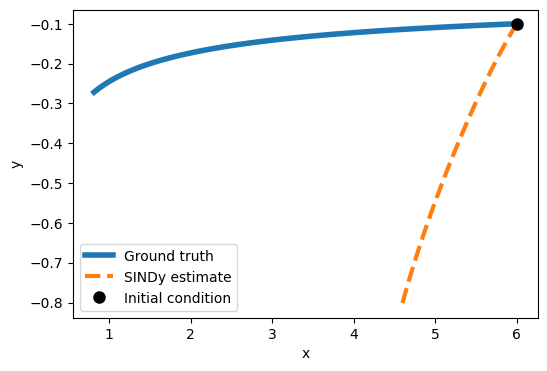

In [227]:
plot_simulation(model, func, 6, -0.1, t)

Not stabel solution with SINDy because Fourier not suitable for expression

In [230]:
model_1 = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.PolynomialLibrary(degree=4),
    optimizer=ps.STLSQ(threshold=0.2),
    feature_names=["x", "y"]
)
model_1.fit(X, t=t)
model_1.print()

(x)' = -1.280 x + -0.960 x^2 y^2
(y)' = 1.000 y


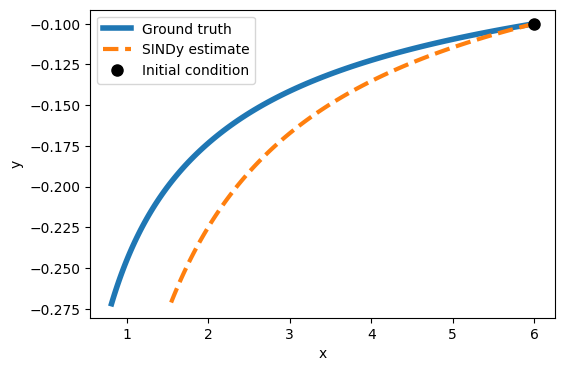

In [232]:
x0 = 6
y0 = -0.1
plot_simulation(model_1, func, x0, y0, t)
res = scipy.integrate.solve_ivp(func, [0, 1], (x0, y0), 'RK45', t) # default integrate RK45
#plt.plot(res.y[0], res.y[1])

# Second example (myself sample)
    12 U'' - 5 U = -7
    the first step i soleved the system with use scipy.integrate, numerical method RK45
    the second create model with to use SINDy

In [233]:
def func(t, X):
    x, y = X
    return [y, (-7 + 5 * y) / 12]

In [234]:
y0 = 1
x0 = 2
res = scipy.integrate.solve_ivp(func, [0, 1], (x0, y0), 'RK45', t) # default integrate RK45
x = res.y[0]
y = res.y[1]
X = np.stack((x, y), axis=-1)

In [235]:
model_2 = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.PolynomialLibrary(degree=2),
    optimizer=ps.STLSQ(threshold=0.2, alpha = 0.1),
    feature_names=["x", "y"]
)

    Возникает ошибка в алгоритме оптимизации, слишком большой параметр порога. Не может оптимизировать целевую функцию. Можно решить понижением порога
    threshold (float, optional, default=0.1) – Minimum magnitude for a coefficient in the weight vector. Coefficients with magnitude below the threshold are set to zero.
    

(x)' = 1.000 y
(y)' = 0.000


/home/makar/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/home/makar/.local/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(


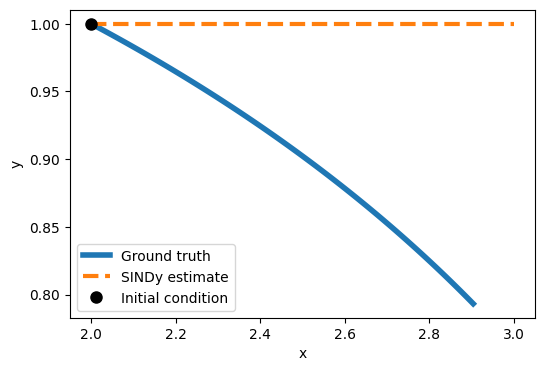

In [236]:
model_2.fit(X, t)
model_2.print()
plot_simulation(model_2, func, x0, y0, t)

(x)' = -590595.907 1 + 383332.253 x + -437641.543 y + -48992.975 x^2 + -107845.494 x y + 1603843.669 y^2 + -2824.939 x^3 + 51761.231 x^2 y + -373470.255 x y^2 + -446658.201 y^3 + 1451.961 x^3 y + -15965.174 x^2 y^2 + 167260.589 x y^3 + -203729.706 y^4
(y)' = -0.112 x y^3
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.5172710398029D+00   r2 =  0.4701618913217D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.5172710398029D+00   r2 =  0.4701618913217D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.5172710398029D+00   r2 =  0.4701618913217D-16
 lsod

/home/makar/.local/lib/python3.8/site-packages/pysindy/utils/axes.py:83: RuntimeWarning: overflow encountered in reduce
  results = super().__array_ufunc__(ufunc, method, *args, **kwargs)
capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


ValueError: Input X contains infinity or a value too large for dtype('float64').

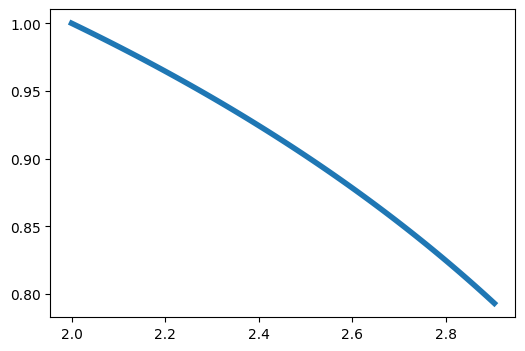

In [237]:
model_2 = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.PolynomialLibrary(degree=4), ## полином 4 степени, возникает ошибка, почему
    optimizer=ps.STLSQ(threshold=0.01),
    feature_names=["x", "y"]
)
model_2.fit(X, t)
model_2.print()
plot_simulation(model_2, func, x0, y0, t)

In [ ]:
model_2 = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.PolynomialLibrary(degree=2),
    optimizer=ps.STLSQ(threshold=0.01),
    feature_names=["x", "y"]
)
model_2.fit(X, t)
model_2.print()
plot_simulation(model_2, func, x0, y0, t)

In [ ]:
model_2 = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.FourierLibrary(), ## полином 4 степени, возникает ошибка, почему
    optimizer=ps.STLSQ(threshold=0.01),
    feature_names=["x", "y"]
)
model_2.fit(X, t)
model_2.print()
plot_simulation(model_2, func, x0, y0, t)

# About Lorenz system
![The first](Lorenz_system.png "Title")
    On the image we can see the model is a system of three ordinary differential equations now known as the Lorenz equations
    

In [ ]:
def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

In [ ]:
## Initial conditions
rho = 28.0
sigma = 10
beta = 8.0 / 3.0
dt = 0.01
## -10.0 * (x - y)
## x * (28.0 - z) - y
## x * y - 8.0 / 3.0 * z

state0 = [1.0, 1.0, 1.0]
time_steps = np.arange(0.0, 40.0, dt)

x_train = scipy.integrate.odeint(f, state0, time_steps)

In [ ]:
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.05),
    feature_library=ps.PolynomialLibrary(degree=2),
)
model.fit(x_train, time_steps)
model.print()

In [ ]:
x_sim = model.simulate(state0, time_steps)
plt.figure(figsize=(6, 4))
plt.plot(x_train[:, 0], x_train[:, 2], label='Ground truth')
plt.plot(x_sim[:, 0], x_sim[:, 2], '--', label='SINDy estimate')
plt.plot(x_train[0, 0], x_train[0, 2], "ko", label="Initial condition", markersize=8)
plt.legend()
plt.draw()
plt.show()

In [ ]:
model.score(x_train, time_steps)

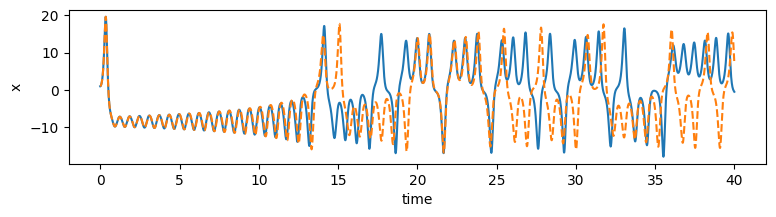

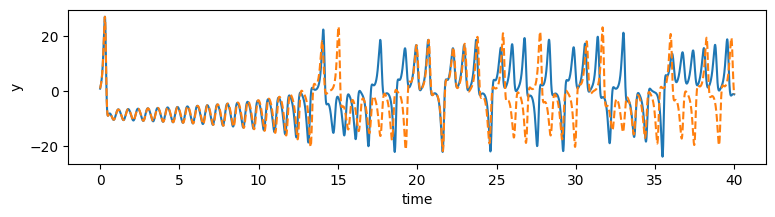

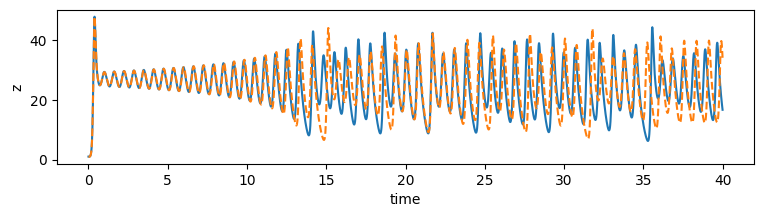

In [238]:
def plot_dimension(dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    ax.plot(time_steps, x_sim[:, dim], "--")
    plt.xlabel("time")
    plt.ylabel(name)

plot_dimension(0, 'x')
plot_dimension(1, 'y')
plot_dimension(2, 'z')

In [196]:
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.05),
    feature_library=ps.FourierLibrary(),
)
model.fit(x_train, time_steps)
model.print()

(x0)' = -0.176 cos(1 x0) + -0.886 sin(1 x1) + 0.525 cos(1 x1) + 0.227 cos(1 x2)
(x1)' = -2.037 sin(1 x0) + -7.256 cos(1 x0) + -0.561 sin(1 x1) + 0.335 cos(1 x1) + -0.127 sin(1 x2) + 0.797 cos(1 x2)
(x2)' = 5.490 sin(1 x0) + 0.623 cos(1 x0) + 3.561 sin(1 x1) + -3.949 cos(1 x1) + -0.265 sin(1 x2)


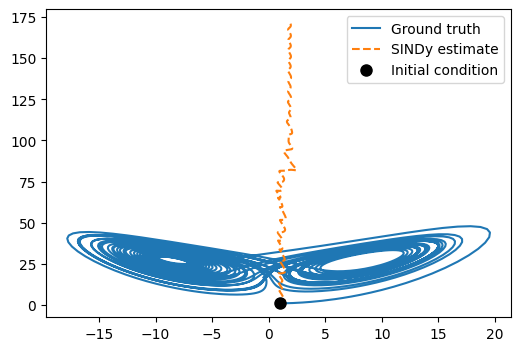

In [197]:
x_sim = model.simulate(state0, time_steps)
plt.figure(figsize=(6, 4))
plt.plot(x_train[:, 0], x_train[:, 2], label='Ground truth')
plt.plot(x_sim[:, 0], x_sim[:, 2], '--', label='SINDy estimate')
plt.plot(x_train[0, 0], x_train[0, 2], "ko", label="Initial condition", markersize=8)
plt.legend()
plt.draw()
plt.show()

# Вывод:
    Алгоритм, зная временной ряд, восстанавливает систему дифференциальных уравнений. Нужно посчитать ошибку вычислений восстановленной системы и истенного решения (не графически). На Аттракторе Лоренца пока выводов нет

# Used literature
    STLSQ lib https://deeptime-ml.github.io/trunk/api/generated/deeptime.sindy.STLSQ.html
    SINDy https://github.com/dynamicslab/pysindy/tree/master/pysindy